In [1]:
import tensorflow as tf
import numpy as np
import pickle
np.random.seed(7)

In [2]:
with open ('C:\\Users\\Wilfred\\Desktop\\Look-ahead-N\\input_layer_4_6_14_2.pickle','rb') as file:
    input_data = pickle.load(file)
permutation = list(np.random.permutation(input_data.shape[0]))
input_data = input_data[permutation,:]
print(input_data.shape)
x_train = input_data[:100000, :]
x_test = input_data[100000:105000, :]


(105000, 24)


In [3]:
with open ('C:\\Users\\Wilfred\\Desktop\\Look-ahead-N\\output_layer_4_6_14_2.pickle','rb') as file:
    output_data = pickle.load(file)
output_data = np.transpose(output_data)
output_data = output_data[permutation,:]
y_train = output_data[:100000, :]
y_test = output_data[100000:105000, :]
print(output_data.shape)

(105000, 12)


In [4]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(180, input_shape = [24], activation = 'relu'),
    tf.keras.layers.Dense(180, activation = 'relu'),
    tf.keras.layers.Dense(180, activation = 'relu'),
    tf.keras.layers.Dense(180, activation = 'relu'),
    tf.keras.layers.Dense(180, activation = 'relu'),
    tf.keras.layers.Dense(12, activation = 'sigmoid')
])
adam = tf.keras.optimizers.Adam(lr = 0.005)
model.compile(optimizer = adam, loss = 'binary_crossentropy', metrics = ['accuracy'])

history = model.fit(x_train, y_train, batch_size = 1024, epochs = 150, verbose = 2, validation_data = (x_test, y_test))


Train on 100000 samples, validate on 5000 samples
Epoch 1/150
100000/100000 - 4s - loss: 0.3866 - accuracy: 0.8409 - val_loss: 0.3164 - val_accuracy: 0.8587
Epoch 2/150
100000/100000 - 3s - loss: 0.2846 - accuracy: 0.8750 - val_loss: 0.2644 - val_accuracy: 0.8815
Epoch 3/150
100000/100000 - 3s - loss: 0.2514 - accuracy: 0.8881 - val_loss: 0.2408 - val_accuracy: 0.8933
Epoch 4/150
100000/100000 - 3s - loss: 0.2251 - accuracy: 0.8999 - val_loss: 0.2168 - val_accuracy: 0.9047
Epoch 5/150
100000/100000 - 3s - loss: 0.2048 - accuracy: 0.9101 - val_loss: 0.1989 - val_accuracy: 0.9119
Epoch 6/150
100000/100000 - 3s - loss: 0.1867 - accuracy: 0.9174 - val_loss: 0.1840 - val_accuracy: 0.9179
Epoch 7/150
100000/100000 - 3s - loss: 0.1729 - accuracy: 0.9219 - val_loss: 0.1753 - val_accuracy: 0.9203
Epoch 8/150
100000/100000 - 3s - loss: 0.1608 - accuracy: 0.9258 - val_loss: 0.1610 - val_accuracy: 0.9246
Epoch 9/150
100000/100000 - 3s - loss: 0.1521 - accuracy: 0.9290 - val_loss: 0.1664 - val_accu

Epoch 77/150
100000/100000 - 3s - loss: 0.0327 - accuracy: 0.9872 - val_loss: 0.0692 - val_accuracy: 0.9761
Epoch 78/150
100000/100000 - 3s - loss: 0.0334 - accuracy: 0.9871 - val_loss: 0.0672 - val_accuracy: 0.9768
Epoch 79/150
100000/100000 - 2s - loss: 0.0319 - accuracy: 0.9877 - val_loss: 0.0687 - val_accuracy: 0.9761
Epoch 80/150
100000/100000 - 3s - loss: 0.0330 - accuracy: 0.9874 - val_loss: 0.0614 - val_accuracy: 0.9786
Epoch 81/150
100000/100000 - 3s - loss: 0.0337 - accuracy: 0.9871 - val_loss: 0.0641 - val_accuracy: 0.9783
Epoch 82/150
100000/100000 - 2s - loss: 0.0317 - accuracy: 0.9879 - val_loss: 0.0668 - val_accuracy: 0.9779
Epoch 83/150
100000/100000 - 3s - loss: 0.0319 - accuracy: 0.9878 - val_loss: 0.0691 - val_accuracy: 0.9766
Epoch 84/150
100000/100000 - 3s - loss: 0.0309 - accuracy: 0.9881 - val_loss: 0.0689 - val_accuracy: 0.9773
Epoch 85/150
100000/100000 - 3s - loss: 0.0328 - accuracy: 0.9875 - val_loss: 0.0699 - val_accuracy: 0.9772
Epoch 86/150
100000/100000 -

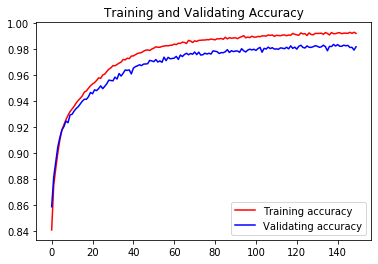

In [6]:
import matplotlib.pyplot as plt
plt.figure()
acc = history.history['accuracy']
loss = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']
epochs = range(len(acc))
plt.plot(epochs, acc, 'r', label = 'Training accuracy')
plt.plot(epochs, val_acc, 'b', label = 'Validating accuracy')
plt.title('Training and Validating Accuracy')
#plt.title('Training Accuracy')
plt.legend()
plt.show()

In [8]:
#model.evaluate(x_test, y_test, verbose = 2)

5000/1 - 0s - loss: 0.0630 - accuracy: 0.9720


[0.04715186712741852, 0.9720002]

In [7]:
model.save('C:\\Users\\Wilfred\\Desktop\\weights\\Look_ahead_N\\Look_ahead_N_4_6_14_2_model.h5')